In [40]:
import numpy as np
import matplotlib.pyplot as plt
import corner
from matplotlib.lines import Line2D

In [41]:
H0, Omega_M, Omega_lambda, w, M = np.loadtxt('estimate_combined.txt', unpack=True)
H0_iter, Omega_M_iter, Omega_lambda_iter, w_iter, M_iter = np.loadtxt('estimate_combined_iter.txt', unpack=True)
H0_SNIa, Omega_M_SNIa, Omega_lambda_SNIa, w_SNIa, M_SNIa = np.loadtxt('estimate_SNIa.txt', unpack=True)
H0_GRB, Omega_M_GRB, Omega_lambda_GRB, w_GRB, M_GRB = np.loadtxt('estimate_GRB.txt', unpack=True)
H0_clusters, Omega_M_clusters, Omega_lambda_clusters, w_clusters, M_clusters = np.loadtxt('estimate_clusters.txt', unpack=True)

def confidence_interval(data, confidence=0.84):
    m = np.quantile(data, 0.5)
    h_low = np.quantile(data, 1-confidence)
    h_high = np.quantile(data, confidence)
    return m, h_low, h_high

<Figure size 900x900 with 0 Axes>

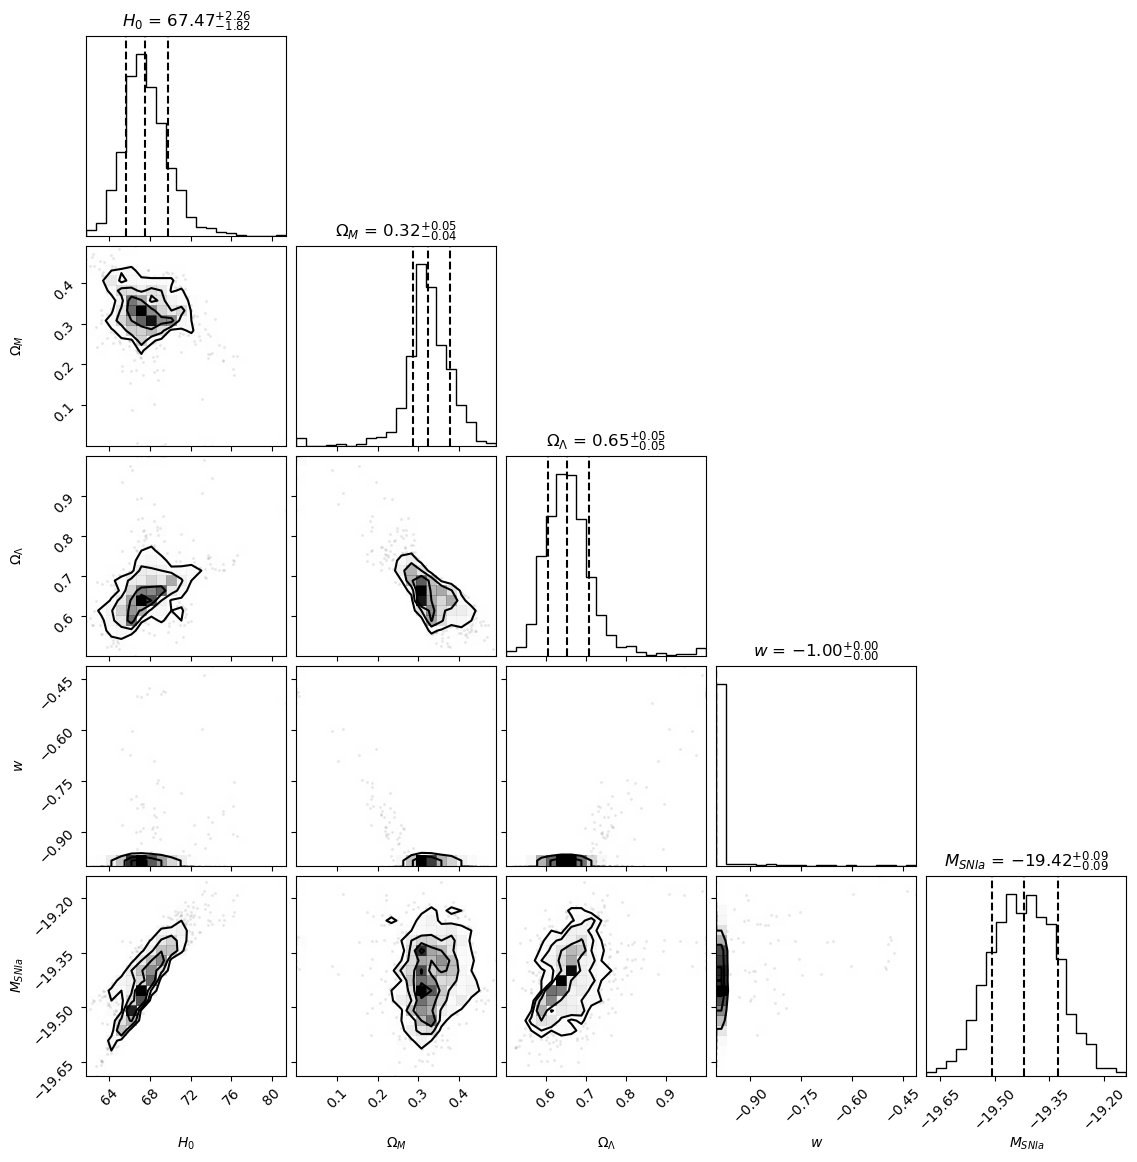

<Figure size 900x900 with 0 Axes>

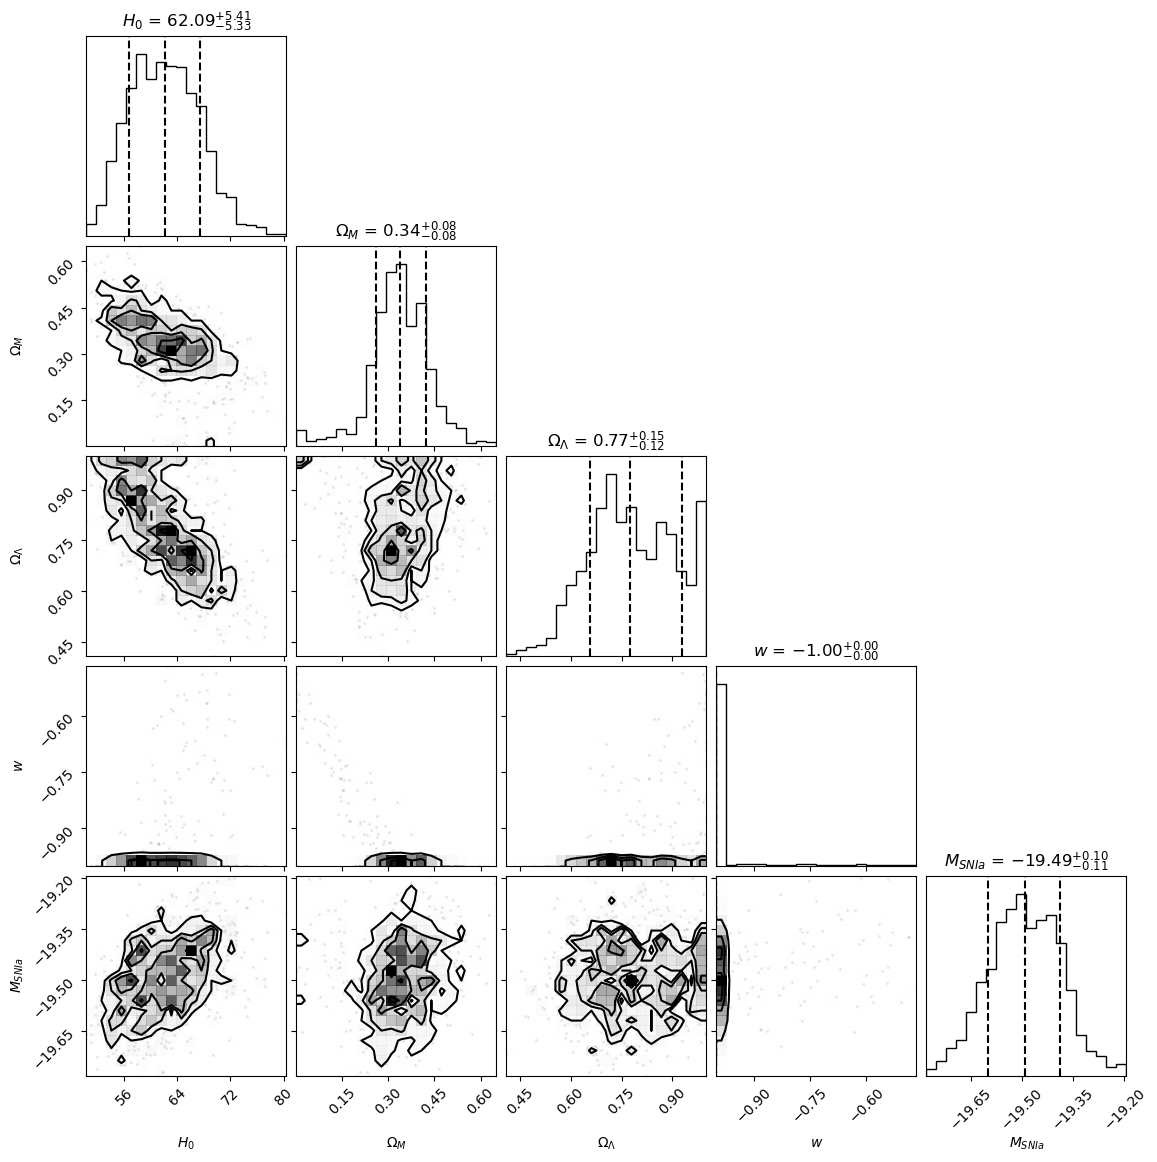

In [42]:
# Combined estimate
estimates = np.array([H0, Omega_M, Omega_lambda, w, M]).T
figure = plt.figure(figsize=(9,9))
corner.corner(np.array(estimates), labels=[r"$H_0$", r"$\Omega_M$", r"$\Omega_{\Lambda}$", r"$w$", r"$M_{SNIa}$"],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_kwargs={"fontsize": 12})
plt.savefig('param_est.png')

# Combined estimate with iteration
estimates_iter = np.array([H0_iter, Omega_M_iter, Omega_lambda_iter, w_iter, M_iter]).T
figure = plt.figure(figsize=(9,9))
corner.corner(np.array(estimates_iter), labels=[r"$H_0$", r"$\Omega_M$", r"$\Omega_{\Lambda}$", r"$w$", r"$M_{SNIa}$"],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_kwargs={"fontsize": 12})
plt.savefig('param_est_iter.png')

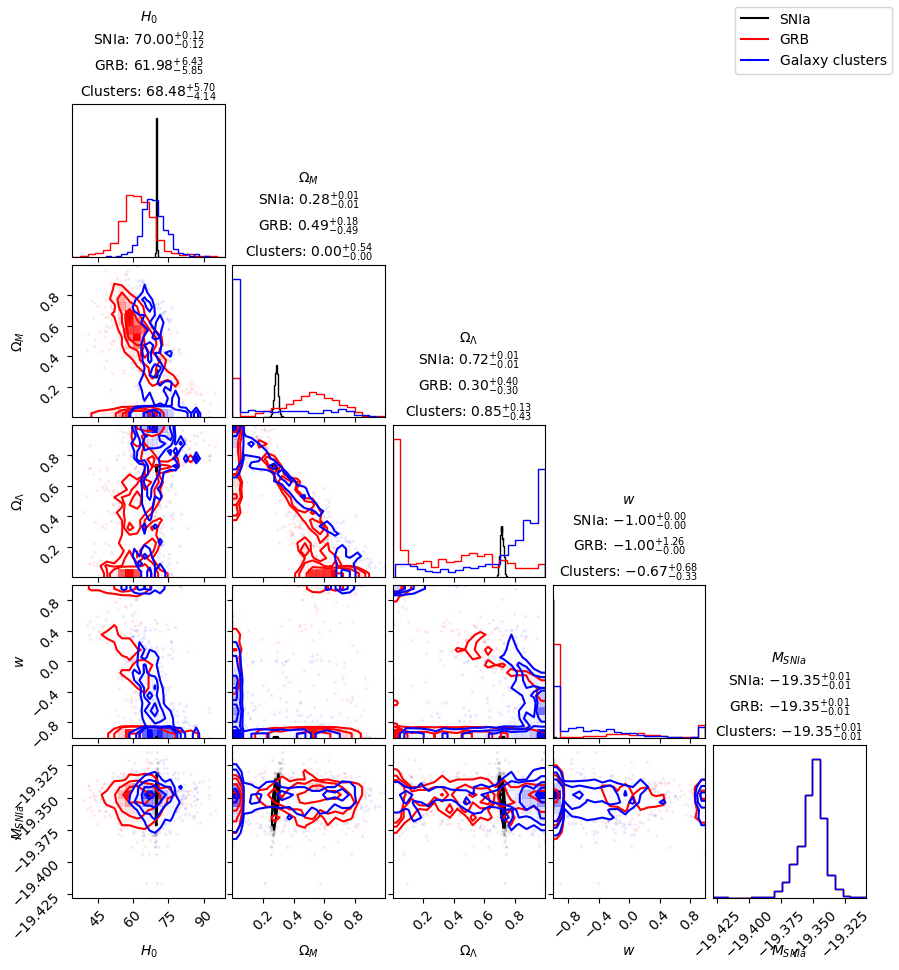

In [43]:
# Individual estimates
estimates_SNIa = np.array([H0_SNIa, Omega_M_SNIa, Omega_lambda_SNIa, w_SNIa, M_SNIa]).T
estimates_GRB = np.array([H0_GRB, Omega_M_GRB, Omega_lambda_GRB, w_GRB, M_GRB]).T
estimates_clusters = np.array([H0_clusters, Omega_M_clusters, Omega_lambda_clusters, w_clusters, M_clusters]).T

## Calculating confidence intervals for labels
ci_SNIa = [confidence_interval(estimates_SNIa[:, i]) for i in range(5)]
ci_GRB = [confidence_interval(estimates_GRB[:, i]) for i in range(5)]
ci_clusters = [confidence_interval(estimates_clusters[:, i]) for i in range(5)]
labels=[r"$H_0$", r"$\Omega_M$", r"$\Omega_{\Lambda}$", r"$w$", r"$M_{SNIa}$"]

figure = plt.figure(figsize=(9,9))
SNIa = corner.corner(np.array(estimates_SNIa), labels=[r"$H_0$", r"$\Omega_M$", r"$\Omega_{\Lambda}$", r"$w$", r"$M_{SNIa}$"], fig=figure, color='black', show_titles=False)
corner.corner(np.array(estimates_GRB), fig=figure, labels=[r"$H_0$", r"$\Omega_M$", r"$\Omega_{\Lambda}$", r"$w$", r"$M_{SNIa}$"],color='red', show_titles=False)
corner.corner(np.array(estimates_clusters), fig=figure, labels=[r"$H_0$", r"$\Omega_M$", r"$\Omega_{\Lambda}$", r"$w$", r"$M_{SNIa}$"], color='blue', show_titles=False)


# get the required axes
axes = figure.get_axes()
new_axes = [axes[i] for i in np.arange(0, 25, 6)]
# set the title for the subplots
for i in range(5):
    title = (f'{labels[i]}\n'
             f'SNIa: ${ci_SNIa[i][0]:.2f}_{{{ci_SNIa[i][1]-ci_SNIa[i][0]:.2f}}}^{{+{ci_SNIa[i][2]-ci_SNIa[i][0]:.2f}}}$\n'
             f'GRB: ${ci_GRB[i][0]:.2f}_{{{ci_GRB[i][1]-ci_GRB[i][0]:.2f}}}^{{+{ci_GRB[i][2]-ci_GRB[i][0]:.2f}}}$\n'
             f'Clusters: ${ci_clusters[i][0]:.2f}_{{{ci_clusters[i][1]-ci_clusters[i][0]:.2f}}}^{{+{ci_clusters[i][2]-ci_clusters[i][0]:.2f}}}$')
    new_axes[i].set_title(title, fontsize=10, y=1)

line_black = Line2D([0], [0], label='SNIa', color='black')
line_red = Line2D([0], [0], label='GRB', color='red')
line_blue = Line2D([0], [0], label='Galaxy clusters', color='blue')

figure.legend(handles=[line_black, line_red, line_blue], fontsize=10)
figure.savefig('param_est_ind.png')
